# End-to-end MNIST

# Training

In [13]:
import utils

x_train_sample, y_train_sample = utils.sample_train_mnist()
x_test_sample, y_test_sample = utils.sample_test_mnist()

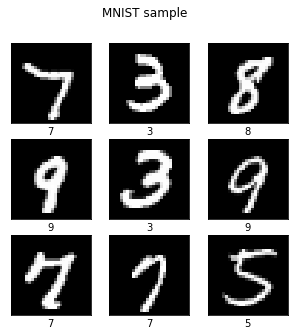

In [2]:
utils.show_numbers(x_train_sample, y_train_sample, title=f"MNIST sample")

In [5]:
import sys
import matplotlib.pyplot as plt
import os
sys.path.insert(0,'..')

import scanflow

from scanflow.setup import Setup, Executor, Workflow
from scanflow.special import Tracker, Checker, Improver, Planner
from scanflow.deploy import Deploy

# App folder
base_path = os.path.dirname(os.getcwd())
app_dir = os.path.join(base_path, "examples/demo_mnist/data-science/")


executors = [Executor(name='modeling-mnist', 
                      file='modeling.py',
                      parameters={'x_train_path': './mnist_sample/train_images.npy', 
                                  'y_train_path': './mnist_sample/train_labels.npy',
                                  'x_test_path': './mnist/test_images.npy',
                                  'y_test_path': './mnist/test_labels.npy'},
                      requirements='req_modeling.txt')           
            ]


workflow1 = Workflow(name='mnist', 
                     executors=executors,
                     # Online debugging: activate agents
                     tracker=Tracker(mode='online'),
                     checker=Checker(mode='online'))
    
setup = Setup(app_dir, workflows=[workflow1],
                             verbose=True)

setup


Setup = (
    Workflows: ['mnist']
)

In [8]:
deployer = Deploy(setup, verbose=True)

deployer.build_workflows()
deployer.start_workflows()

100%|██████████| 1/1 [00:00<00:00, 37.22it/s]


In [7]:
deployer.run_workflows()

  0%|          | 0/1 [00:00<?, ?it/s]22-Mar-21 13:26:23 -  INFO - [++] Running workflow: [mnist].
22-Mar-21 13:26:23 -  INFO - [+] Running env: [mnist:modeling-mnist].
22-Mar-21 13:26:37 -  INFO - [+] Running (modeling.py). 
100%|██████████| 10/10 [00:05<00:00,  1.99it/s]
Successfully registered model 'mnist_cnn'.
2021/03/22 12:26:36 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: mnist_cnn, version 1
Created version '1' of model 'mnist_cnn'.
 
22-Mar-21 13:26:37 -  INFO - [+] Environment (modeling-mnist) finished successfully. 
22-Mar-21 13:26:37 -  INFO - [+] Workflow: [mnist] was run successfully.
100%|██████████| 1/1 [00:13<00:00, 13.42s/it]

Elapsed time: 13.42105770111084


In [4]:
# deployer.stop_workflows()

# Predictor (batch)

In [23]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
sys.path.insert(0,'..')

import scanflow

from scanflow.setup import Setup, Executor, Workflow
from scanflow.special import Tracker, Checker, Improver, Planner
from scanflow.deploy import Deploy

# App folder
base_path = os.path.dirname(os.getcwd())
app_dir = os.path.join(base_path, "examples/demo_mnist/data-science/")


executors = [Executor(name='predictor', 
                      file='predictor-batch.py',
                      parameters={'input_path': './mnist_sample/test_images.npy',
                                 'model_name':'mnist_cnn', 'model_version':1},
                      requirements='req_predictor.txt')           
            ]


workflow1 = Workflow(name='mnist', 
                     executors=executors,
                     tracker=Tracker(mode='online'),
                     checker=Checker(mode='online'),
                     improver=Improver(mode='online'),
                     planner=Planner(mode='online'))
    
setup = Setup(app_dir, workflows=[workflow1],
                             verbose=False)

setup

22-Mar-21 13:32:06 -  INFO - [Tracker] Port 8002 is set successfully.
22-Mar-21 13:32:06 -  INFO - [Checker] Port 8004 is set successfully.
22-Mar-21 13:32:06 -  INFO - [Improver] Port 8006 is set successfully.
22-Mar-21 13:32:06 -  INFO - [Planner] Port 8007 is set successfully.



Setup = (
    Workflows: ['mnist']
)

In [5]:
# setup.draw_graph()

In [24]:
deployer = Deploy(setup, verbose=True)

deployer.build_workflows()
deployer.start_workflows()
# deployer.pipeline() # Build, Start and Run

22-Mar-21 13:32:06 -  INFO - [+] Compose file [/home/guess/Desktop/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-repository/docker-compose.yml] was created successfully.
22-Mar-21 13:32:06 -  INFO - [+] Main file [/home/guess/Desktop/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-repository/main.py] was created successfully.
22-Mar-21 13:32:06 -  INFO - [+] Compose file [/home/guess/Desktop/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-verbose/docker-compose.yml] was created successfully.
22-Mar-21 13:32:06 -  INFO - [+] Main file [/home/guess/Desktop/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-verbose/main.py] was created successfully.
22-Mar-21 13:32:06 -  INFO - [+] Compose file [/home/guess/Desktop/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-swarm/docker-compose.yml] was created successfully.
22-Mar-21 13:32:06 -  INFO - [+] Main file [/home/guess/Desktop/scanflow/examples/de

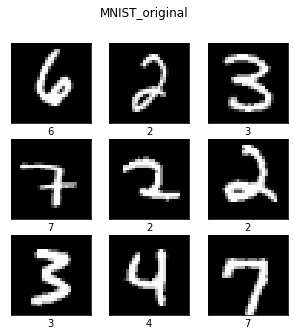

In [25]:
utils.show_numbers(x_test_sample, y_test_sample, title=f"MNIST_original")

In [26]:
deployer.run_workflows()

  0%|          | 0/1 [00:00<?, ?it/s]22-Mar-21 13:32:13 -  INFO - [++] Running workflow: [mnist].
22-Mar-21 13:32:13 -  INFO - [+] Running env: [mnist:predictor].
22-Mar-21 13:32:16 -  INFO - [+] Running (predictor-batch.py). 
22-Mar-21 13:32:16 -  INFO - [+] Output:     predictions
0            6
1            2
2            3
3            4
4            4
5            2
6            3
7            4
8            4
9            0
 
22-Mar-21 13:32:16 -  INFO - [+] Environment (predictor) finished successfully. 
22-Mar-21 13:32:16 -  INFO - [+] Workflow: [mnist] was run successfully.
100%|██████████| 1/1 [00:02<00:00,  2.65s/it]

Elapsed time: 2.6496496200561523


In [27]:
!curl -X 'GET' \
  'http://localhost:8003/send/checker/anomaly' \
  -H 'accept: application/json'

{"feedback":{"input_run_id":"adbc5d92b3a54860b86583d41bc493d9","input_path":"input.npy","n_anomalies":108,"percentage_anomalies":0.108},"conclusions":{"action":"Retraining the model using the new data: /tmp/input.npy","planner":{"Plan":{"action":"Transition new model to Production.","current_model_name":"mnist_cnn","new_model_name":"mnist_cnn_new","result":"Current model stage = Staging. New model stage = Production"}}}}

# Input anomalies

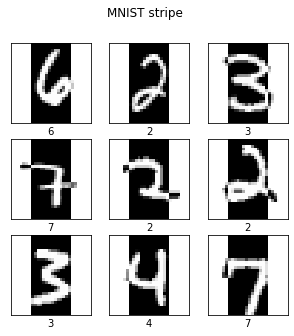

In [28]:
x_test_sample_c, y_test_sample_c = utils.sample_test_mnist_c(corruption='stripe')
utils.show_numbers(x_test_sample_c, y_test_sample_c, title=f"MNIST stripe")


In [29]:
deployer.run_workflows()

  0%|          | 0/1 [00:00<?, ?it/s]22-Mar-21 13:32:18 -  INFO - [++] Running workflow: [mnist].
22-Mar-21 13:32:18 -  INFO - [+] Running env: [mnist:predictor].
22-Mar-21 13:32:20 -  INFO - [+] Running (predictor-batch.py). 
22-Mar-21 13:32:20 -  INFO - [+] Output:     predictions
0            6
1            2
2            3
3            4
4            4
5            2
6            3
7            4
8            4
9            0
 
22-Mar-21 13:32:20 -  INFO - [+] Environment (predictor) finished successfully. 
22-Mar-21 13:32:20 -  INFO - [+] Workflow: [mnist] was run successfully.
100%|██████████| 1/1 [00:02<00:00,  2.40s/it]

Elapsed time: 2.405897378921509


In [30]:
!curl -X 'GET' \
  'http://localhost:8003/send/checker/anomaly' \
  -H 'accept: application/json'

{"feedback":{"input_run_id":"75195cdf72244b8a83d4dc009f1f7550","input_path":"input.npy","n_anomalies":109,"percentage_anomalies":0.109},"conclusions":{"action":"Retraining the model using the new data: /tmp/input.npy","planner":{"Plan":{"action":"Transition new model to Production.","current_model_name":"mnist_cnn","new_model_name":"mnist_cnn_new","result":"Current model stage = Staging. New model stage = Production"}}}}

In [22]:
deployer.stop_workflows()

22-Mar-21 13:31:13 -  INFO - [+] Environment: [predictor] was stopped successfully.
22-Mar-21 13:31:23 -  INFO - [+] Tracker: [tracker-mnist] was stopped successfully.
22-Mar-21 13:31:34 -  INFO - [+] Tracker agent: [tracker-agent-mnist] was stopped successfully.
22-Mar-21 13:31:34 -  INFO - [+] Checker: [checker-mnist] was stopped successfully.
22-Mar-21 13:31:45 -  INFO - [+] Checker agent: [checker-agent-mnist] was stopped successfully.
22-Mar-21 13:31:55 -  INFO - [+] Improver agent: [improver-agent-mnist] was stopped successfully.
22-Mar-21 13:32:06 -  INFO - [+] Planner agent: [planner-agent-mnist] was stopped successfully.
22-Mar-21 13:32:06 -  INFO - [+] Stopped containers were pruned.
22-Mar-21 13:32:06 -  INFO - [+] Network: [network_mnist] is not running in local.


# Tracker

In [3]:
import pandas as pd
from scanflow import track

tracker = track.Tracker(app_dir)
last_artifacts = tracker.list_artifacts(workflow_name='mnist')
print(last_artifacts.keys())


21-Mar-21 18:11:15 -  INFO - [Tracker]  'run_id' is not provided. Loading the latest experiment.
21-Mar-21 18:11:15 -  INFO - [Tracker]  'experiment_name' is not provided. Loading the 'Default' experiment.


dict_keys(['input.npy', 'preds.csv'])


In [4]:
input_loaded = np.load(last_artifacts['input.npy'])
input_loaded.shape

(1000, 28, 28)

# TODO


- let human label the inputs using checker